# $\color{darkblue}{\text{Hotel Booking}}$ 


###  $\color{lightblue}{\text{ Import Packages:}}$ 

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA


# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from sklearn.metrics import plot_confusion_matrix
from sklearn import tree



In [95]:
## !pip install xgboost

 ###  $\color{lightblue}{\text{ Now import and display the dataset:}}$ 

In [396]:
## Importing Data
path = "BookingData (1).csv"
df = pd.read_csv(path)

df.shape
## Show the first 5 rows of Data
df.head()

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Canelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Breakfst_included,Longitude_x,Latitude_y,Link
0,0,الريـم,Al Ula,SAR179,5,Only 1 room left like this on our site,6330099,NaN,NaN,Economy Room,...,FREE cancellation,Max persons: 2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,NaN,Reservation possible without a credit card,NaN,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,SAR195,5,Only 2 rooms like this left on our site,5326174,9.0,169 reviews,Deluxe Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,Reservation possible without a credit card,NaN,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,2,فندق راية الشلال 2,Riyadh,SAR200,5,Only 3 rooms like this left on our site,5987844,8.7,17 reviews,Deluxe Double Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,NaN,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,3,Four Points by SheratonMakkah Al Naseem,Makkah,SAR225,5,Only 5 rooms like this left on our site,3889445,8.7,"9,418 reviews",Superior Room,...,FREE cancellation,Max persons: 2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,NaN,NaN,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...
4,4,نزل الثريا للوحدات السكنية,Taif,SAR250,5,NaN,6284346,NaN,NaN,Budget Double Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 double),includes taxes and charges,NaN,Reservation possible without a credit card,NaN,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...


In [397]:
df = df.replace({np.nan: None})

In [398]:
df.shape

(1025, 21)

## $\color{lightblue}{\text{ Data Preprocessing: }}$ 

### $\color{lightblue}{\text{ 1. Dealing with Missing Values: }}$ 

In [399]:
df.isnull().sum()

Unnamed: 0                0
Name                      0
City                      0
Price                     0
Star_Rating               0
Property_Demand         275
Property_id               0
Customers_Rating         69
Customers_Review         69
Type_of_room              1
reservations_Payment    290
Canelation              179
Max_persons               0
Bed_type                 19
Tax                       0
Review_title             69
Credit_card             321
Breakfst_included       941
Longitude_x               0
Latitude_y                0
Link                      0
dtype: int64

###  $\color{blak}{\text{ We have 10 features with missing values. }}$ 

In [400]:
#Determine the total amount of missing values
df.isnull().sum().sum()

2233

In [401]:
## Find the missing value, show the total null values for each column and sort it in descending order
df.isnull().sum().sort_values()

Unnamed: 0                0
Longitude_x               0
Tax                       0
Max_persons               0
Latitude_y                0
Property_id               0
Link                      0
Star_Rating               0
Price                     0
City                      0
Name                      0
Type_of_room              1
Bed_type                 19
Customers_Rating         69
Customers_Review         69
Review_title             69
Canelation              179
Property_Demand         275
reservations_Payment    290
Credit_card             321
Breakfst_included       941
dtype: int64

In [402]:
#df.fillna(0)


In [403]:
df = df.drop('Breakfst_included', axis = 1)
#because it has more than 50% missing values

In [404]:
## For the missing values in the Type_of_room column, replace it with mode (value that appears most often)
df['Type_of_room'].fillna(df.Type_of_room.mode().to_string(), inplace=True)

In [405]:
## If no Customers Rating is null, just replace it with 0
#df[['Customers_Rating']] = df[['Customers_Rating']].fillna(0.0)

In [406]:
df

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,reservations_Payment,Canelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Longitude_x,Latitude_y,Link
0,0,الريـم,Al Ula,SAR179,5,Only 1 room left like this on our site,6330099,None,None,Economy Room,No prepayment needed,FREE cancellation,Max persons: 2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,None,Reservation possible without a credit card,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,SAR195,5,Only 2 rooms like this left on our site,5326174,9.0,169 reviews,Deluxe Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,Reservation possible without a credit card,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,2,فندق راية الشلال 2,Riyadh,SAR200,5,Only 3 rooms like this left on our site,5987844,8.7,17 reviews,Deluxe Double Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,3,Four Points by SheratonMakkah Al Naseem,Makkah,SAR225,5,Only 5 rooms like this left on our site,3889445,8.7,"9,418 reviews",Superior Room,None,FREE cancellation,Max persons: 2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,None,39.874312,21.38081,https://www.booking.com/hotel/sa/four-points-b...
4,4,نزل الثريا للوحدات السكنية,Taif,SAR250,5,None,6284346,None,None,Budget Double Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),includes taxes and charges,None,Reservation possible without a credit card,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1020,Al Corniche Hotel Suites & Villas,Hail,SAR133,0,Only 5 like this left on our site,737295,7.5,193 reviews,Twin Room,No prepayment needed,FREE cancellation,Max persons: 2,2 beds\n(2 singles),includes taxes and charges,Good,Reservation possible without a credit card,41.691796,27.469497,https://www.booking.com/hotel/sa/ossuuuo-uuo-u...
1021,1021,Golden Tower Hotel,Al Jubail,SAR134,0,None,3418383,7.2,421 reviews,Deluxe Double Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 10 taxes and charges,Good,Reservation possible without a credit card,49.656744,26.989869,https://www.booking.com/hotel/sa/golden-tower....
1022,1022,Drr Ramah Suites 2,Riyadh,SAR134,0,Only 3 like this left on our site,371101,6.5,194 reviews,King Studio,None,None,Max persons: 2,1 bed\n(1 double),+SAR 7 taxes and charges,Fair,Reservation possible without a credit card,46.668347,24.765365,https://www.booking.com/hotel/sa/dorrar-ramah....
1023,1023,Taj Al Khaleej Furnished Units 2,Taif,SAR135,0,Only 1 left like this on our site,3445586,8.9,122 reviews,Deluxe Apartment,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,38.671166,31.655781,https://www.booking.com/hotel/sa/tj-lkhlyj-llw...


In [407]:
#df["Customers_Review"].fillna( method ='bfill', inplace = True)
df[['Customers_Review','R']] = df["Customers_Review"].str.split(n=1, expand=True)
df['Customers_Review']  =  df['Customers_Review'].str.replace(',', '')
df['Customers_Review'] = df['Customers_Review'].astype(float)
df.drop('R', axis=1, inplace=True)


df['Customers_Review'].fillna(df.Customers_Review.mean(), inplace=True)
df['Customers_Review'] = df['Customers_Review'].astype(int)


In [408]:
df["Review_title"].fillna( method ='ffill', inplace = True)
df["Review_title"].fillna( method ='bfill', inplace = True)

In [409]:
df["Canelation"].fillna( method ='bfill', inplace = True)

In [410]:
df["Property_Demand"].fillna( method ='bfill', inplace = True)

In [411]:
df["reservations_Payment"].fillna( method ='bfill', inplace = True)

In [412]:
df["Credit_card"].fillna( method ='bfill', inplace = True)

In [413]:
df["Bed_type"].fillna( method ='bfill', inplace = True)

In [414]:
df["Customers_Rating"].fillna( method ='bfill', inplace = True)

In [415]:
#df['Customers_Rating'] = df['Customers_Rating'].astype(float)
df['Customers_Rating'].fillna(df.Customers_Rating.mean(), inplace=True)

In [416]:
df

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,reservations_Payment,Canelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Longitude_x,Latitude_y,Link
0,0,الريـم,Al Ula,SAR179,5,Only 1 room left like this on our site,6330099,9.0,668,Economy Room,No prepayment needed,FREE cancellation,Max persons: 2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,Superb,Reservation possible without a credit card,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,SAR195,5,Only 2 rooms like this left on our site,5326174,9.0,169,Deluxe Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,Reservation possible without a credit card,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,2,فندق راية الشلال 2,Riyadh,SAR200,5,Only 3 rooms like this left on our site,5987844,8.7,17,Deluxe Double Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,3,Four Points by SheratonMakkah Al Naseem,Makkah,SAR225,5,Only 5 rooms like this left on our site,3889445,8.7,9418,Superior Room,No prepayment needed,FREE cancellation,Max persons: 2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,Reservation possible without a credit card,39.874312,21.38081,https://www.booking.com/hotel/sa/four-points-b...
4,4,نزل الثريا للوحدات السكنية,Taif,SAR250,5,Only 1 left like this on our site,6284346,8.4,668,Budget Double Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),includes taxes and charges,Fabulous,Reservation possible without a credit card,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1020,Al Corniche Hotel Suites & Villas,Hail,SAR133,0,Only 5 like this left on our site,737295,7.5,193,Twin Room,No prepayment needed,FREE cancellation,Max persons: 2,2 beds\n(2 singles),includes taxes and charges,Good,Reservation possible without a credit card,41.691796,27.469497,https://www.booking.com/hotel/sa/ossuuuo-uuo-u...
1021,1021,Golden Tower Hotel,Al Jubail,SAR134,0,Only 3 like this left on our site,3418383,7.2,421,Deluxe Double Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 10 taxes and charges,Good,Reservation possible without a credit card,49.656744,26.989869,https://www.booking.com/hotel/sa/golden-tower....
1022,1022,Drr Ramah Suites 2,Riyadh,SAR134,0,Only 3 like this left on our site,371101,6.5,194,King Studio,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 7 taxes and charges,Fair,Reservation possible without a credit card,46.668347,24.765365,https://www.booking.com/hotel/sa/dorrar-ramah....
1023,1023,Taj Al Khaleej Furnished Units 2,Taif,SAR135,0,Only 1 left like this on our site,3445586,8.9,122,Deluxe Apartment,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,38.671166,31.655781,https://www.booking.com/hotel/sa/tj-lkhlyj-llw...


 ### $\color{lightblue}{\text{ 2. Converting Datatype: }}$ 



In [243]:
df.dtypes

Unnamed: 0                int64
Name                     object
City                     object
Price                    object
Star_Rating               int64
Property_Demand          object
Property_id               int64
Customers_Rating        float64
Customers_Review          int32
Type_of_room             object
reservations_Payment     object
Canelation               object
Max_persons              object
Bed_type                 object
Tax                      object
Review_title             object
Credit_card              object
Longitude_x              object
Latitude_y               object
Link                     object
dtype: object

In [247]:
df.isnull().sum().sum()

0

In [248]:
df.isnull().sum().sort_values()

Unnamed: 0              0
Longitude_x             0
Credit_card             0
Review_title            0
Tax                     0
Bed_type                0
Max_persons             0
Canelation              0
reservations_Payment    0
Type_of_room            0
Customers_Review        0
Customers_Rating        0
Property_id             0
Property_Demand         0
Star_Rating             0
Price                   0
City                    0
Name                    0
Latitude_y              0
Link                    0
dtype: int64

In [159]:
df.head(5)

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,reservations_Payment,Canelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Longitude_x,Latitude_y,Link
0,0,الريـم,Al Ula,SAR179,5,Only 1 room left like this on our site,6330099,9.0,668,Economy Room,No prepayment needed,FREE cancellation,Max persons: 2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,None,Reservation possible without a credit card,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,SAR195,5,Only 2 rooms like this left on our site,5326174,9.0,169,Deluxe Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,Reservation possible without a credit card,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,2,فندق راية الشلال 2,Riyadh,SAR200,5,Only 3 rooms like this left on our site,5987844,8.7,17,Deluxe Double Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,3,Four Points by SheratonMakkah Al Naseem,Makkah,SAR225,5,Only 5 rooms like this left on our site,3889445,8.7,9418,Superior Room,No prepayment needed,FREE cancellation,Max persons: 2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,Reservation possible without a credit card,39.874312,21.38081,https://www.booking.com/hotel/sa/four-points-b...
4,4,نزل الثريا للوحدات السكنية,Taif,SAR250,5,Only 1 left like this on our site,6284346,8.4,668,Budget Double Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),includes taxes and charges,Fabulous,Reservation possible without a credit card,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...


In [352]:
# Get list of categorical variables
s = (df.dtypes == 'object')
print(s)
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Unnamed: 0              False
Name                     True
City                     True
Price                    True
Star_Rating             False
Property_Demand          True
Property_id             False
Customers_Rating        False
Customers_Review        False
Type_of_room             True
reservations_Payment     True
Canelation               True
Max_persons              True
Bed_type                 True
Tax                      True
Review_title             True
Credit_card              True
Longitude_x              True
Latitude_y               True
Link                     True
dtype: bool
Categorical variables:
['Name', 'City', 'Price', 'Property_Demand', 'Type_of_room', 'reservations_Payment', 'Canelation', 'Max_persons', 'Bed_type', 'Tax', 'Review_title', 'Credit_card', 'Longitude_x', 'Latitude_y', 'Link']


In [353]:
df_num = df.select_dtypes(exclude='object')
df_num

,Unnamed: 0,Star_Rating,Property_id,Customers_Rating,Customers_Review
0,0,5,6330099,9.0,668
1,1,5,5326174,9.0,169
2,2,5,5987844,8.7,17
3,3,5,3889445,8.7,9418
4,4,5,6284346,8.4,668
...,...,...,...,...,...
1020,1020,0,737295,7.5,193
1021,1021,0,3418383,7.2,421
1022,1022,0,371101,6.5,194
1023,1023,0,3445586,8.9,122


In [354]:
df_cat = df[object_cols]
df_cat

,Name,City,Price,Property_Demand,Type_of_room,reservations_Payment,Canelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Longitude_x,Latitude_y,Link
0,الريـم,Al Ula,SAR179,Only 1 room left like this on our site,Economy Room,No prepayment needed,FREE cancellation,Max persons: 2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,Superb,Reservation possible without a credit card,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,Copper Crown Furnished Apartments,Khamis Mushayt,SAR195,Only 2 rooms like this left on our site,Deluxe Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,Reservation possible without a credit card,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,فندق راية الشلال 2,Riyadh,SAR200,Only 3 rooms like this left on our site,Deluxe Double Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,Four Points by SheratonMakkah Al Naseem,Makkah,SAR225,Only 5 rooms like this left on our site,Superior Room,No prepayment needed,FREE cancellation,Max persons: 2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,Reservation possible without a credit card,39.874312,21.38081,https://www.booking.com/hotel/sa/four-points-b...
4,نزل الثريا للوحدات السكنية,Taif,SAR250,Only 1 left like this on our site,Budget Double Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),includes taxes and charges,Fabulous,Reservation possible without a credit card,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,Al Corniche Hotel Suites & Villas,Hail,SAR133,Only 5 like this left on our site,Twin Room,No prepayment needed,FREE cancellation,Max persons: 2,2 beds\n(2 singles),includes taxes and charges,Good,Reservation possible without a credit card,41.691796,27.469497,https://www.booking.com/hotel/sa/ossuuuo-uuo-u...
1021,Golden Tower Hotel,Al Jubail,SAR134,Only 3 like this left on our site,Deluxe Double Room,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 10 taxes and charges,Good,Reservation possible without a credit card,49.656744,26.989869,https://www.booking.com/hotel/sa/golden-tower....
1022,Drr Ramah Suites 2,Riyadh,SAR134,Only 3 like this left on our site,King Studio,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 7 taxes and charges,Fair,Reservation possible without a credit card,46.668347,24.765365,https://www.booking.com/hotel/sa/dorrar-ramah....
1023,Taj Al Khaleej Furnished Units 2,Taif,SAR135,Only 1 left like this on our site,Deluxe Apartment,No prepayment needed,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,38.671166,31.655781,https://www.booking.com/hotel/sa/tj-lkhlyj-llw...


In [417]:
## Testing Purposes
df3= df.copy()
df3.Bed_type.value_counts()


1 bed\n(1 extra-large double)                            280
2 beds\n(2 singles)                                      240
1 bed\n(1 large double)                                  168
1 bed\n(1 double)                                        165
2 beds\n(1 extra-large double, 1 sofa bed)                23
                                                        ... 
4 beds\n(2 singles, 1 extra-large double, 1 sofa bed)      1
4 beds\n(3 singles, 1 extra-large double)                  1
4 beds\n(3 sofa beds, 1 large double)                      1
6 beds\n(2 singles, 1 double, 3 sofa beds)                 1
2 beds\n(1 single, 1 extra-large double)                   1
Name: Bed_type, Length: 65, dtype: int64

In [418]:
df2= df.copy()

## Extracting Numbers from the columns 
df2.Max_persons = df.Max_persons.str.extract('(\d+)')




df2.Price =  df2.Price.apply(lambda x: x.replace('SAR',''))
df2.Price =  df2.Price.apply(lambda x: x.replace(',',''))


## Replace a free cancellationn with 1 == True , 
df2["Canelation"].replace({"FREE cancellation": "1"}, inplace=True)

## Replace a Reservation possible without a credit card with 1 == True , 
## Assuming this means they also accept cash
df2["Credit_card"].replace({"Reservation possible without a credit card": "1"}, inplace=True)

## Replace a No prepayment needed with 0 == False since it is according to our column reservations_Payment 0 false -not required.   , 
df2["reservations_Payment"].replace({"No prepayment needed": "1"}, inplace=True)


## Renaming columns 
df2.rename({'Canelation': 'Free_Cancellation'}, axis=1, inplace=True)
df2.rename({'Credit_card': 'CreditCardANDCash'}, axis=1, inplace=True)
df2.rename({'Unnamed: 0': 'ID'}, axis=1, inplace=True)



## Tax
df2.Tax = df.Tax.str.extract('(\d+)')
##  includes taxes and charges  --> Nan 
## Replace Tax ::  includes taxes and charges  --> with 0  since there has to be a tax ..
## and 0 tax should also mean that the tax is included in the original price
df2['Tax'] = df2['Tax'].fillna(0)


## Drop Link since we have No use for it
df2.drop('Link', axis=1, inplace=True)
## Drop Breakfast
#df2.drop('Breakfst_included', axis=1, inplace=True)
#df2.drop('Unnamed: 0', axis=1, inplace=True)

df2["Price"] = df2["Price"].astype(float)
df2["Tax"] = df2["Tax"].astype(int)


df2["Total_Price"] = df2["Price"] + df2["Tax"]

#df2



In [419]:
## Splitting the bed 
df2['NumberOfBeds'] , df2['BedsDetails']  = df2['Bed_type'].str.rsplit('\n', 1).str

## Splitting the City and then filling Nulll values in the City to be the values from the other colum same row. 
#df2['BedTypeDetails'] , df2['BedType']  = df2['Bed_type'].str.rsplit('\n', 1).str
df2.NumberOfBeds =  df2.NumberOfBeds.apply(lambda x: x.replace('bed',''))
df2.NumberOfBeds =  df2.NumberOfBeds.apply(lambda x: x.replace('s',''))
#df2.NumberOfBeds.value_counts()


df2.BedsDetails =  df2.BedsDetails.apply(lambda x: x.replace('(',''))
df2.BedsDetails =  df2.BedsDetails.apply(lambda x: x.replace(')',''))

df2.BedsDetails =  df2.BedsDetails.apply(lambda x: x.replace('singles','single'))
df2.BedsDetails =  df2.BedsDetails.apply(lambda x: x.replace('beds','bed'))
df2.BedsDetails =  df2.BedsDetails.apply(lambda x: x.replace('doubles','double'))
df2.BedsDetails =  df2.BedsDetails.apply(lambda x: x.replace(u'\xa0', u'')) ### ['2 single', '\xa01 extra-large double']

#df2.BedsDetails.value_counts()
# extra-large double ,    sofa bed,    large double,     double,     single,  bunk bed --> 6 Types
columns2 = ["extra-large double" ,    "sofa bed",    "large double",     "double",     "single",  "bunk bed" ]

#df4 = df2['BedsDetails'].str.split(',', expand=True)
#df4 = pd.get_dummies(df2.BedsDetails).reindex(columns = columns2, fill_value=0)

# df4 = df2.join(pd.DataFrame(df2.pop('BedsDetails').values.tolist()))


C:\Users\Z_10__~1\AppData\Local\Temp/ipykernel_24056/2601790589.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df2['NumberOfBeds'] , df2['BedsDetails']  = df2['Bed_type'].str.rsplit('\n', 1).str


In [420]:
#for row in df2.itertuples(index=True, name='Pandas'):
#    arrays = (row.BedsDetails).str.split(',')
#    print(arrays)

df_bedType = pd.DataFrame(columns=[ "ID",  "extra-large double" ,    "sofa bed",    "large double",     "double",     "single",  "bunk bed"])


for index, row in df2.iterrows():
    rowArray= (row["BedsDetails"]).split(',')  
    #print(index)
    sofa= 0  
    XlargeDouble= 0  
    largeDouble= 0  
    double= 0 
    single= 0 
    bunkBed = 0 

    #print(arrays)
    for i in rowArray:
        bedTypeNumbers, bedType = i.split(' ', 1)
        #print(bedTypeNumbers)
        if bedType == 'single':
            single = bedTypeNumbers
        elif bedType == 'extra-large double':
            XlargeDouble = bedTypeNumbers
        elif bedType == 'sofa bed':
            sofa = bedTypeNumbers
        elif bedType == 'large double':
            largeDouble = bedTypeNumbers
        elif bedType == 'double':
            double = bedTypeNumbers
        else:
            bunkBed = bedTypeNumbers
        new_row = pd.Series(data={'ID': index  , "extra-large double":  XlargeDouble ,    "sofa bed":  sofa   ,    "large double": largeDouble   ,
                              "double":  double     ,     "single":   single   ,  "bunk bed":   bunkBed        })
    
        #append row to the dataframe
        df_bedType = df_bedType.append(new_row, ignore_index=True)        

df_bedType

,ID,extra-large double,sofa bed,large double,double,single,bunk bed
0,0,0,0,3,0,0,0
1,1,1,0,0,0,0,0
2,2,0,0,0,1,0,0
3,3,0,0,0,0,2,0
4,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...
1147,1020,0,0,0,0,2,0
1148,1021,0,0,0,1,0,0
1149,1022,0,0,0,1,0,0
1150,1023,1,0,0,0,0,0


In [421]:
df3 = pd.merge(df2, df_bedType, on='ID') 

In [422]:
df3

,ID,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Latitude_y,Total_Price,NumberOfBeds,BedsDetails,extra-large double,sofa bed,large double,double,single,bunk bed
0,0,الريـم,Al Ula,179.0,5,Only 1 room left like this on our site,6330099,9.0,668,Economy Room,...,26.648656,179.0,3,3 large double,0,0,3,0,0,0
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,195.0,5,Only 2 rooms like this left on our site,5326174,9.0,169,Deluxe Room,...,18.242741,195.0,1,1 extra-large double,1,0,0,0,0,0
2,2,فندق راية الشلال 2,Riyadh,200.0,5,Only 3 rooms like this left on our site,5987844,8.7,17,Deluxe Double Room,...,28.370666,200.0,1,1 double,0,0,0,1,0,0
3,3,Four Points by SheratonMakkah Al Naseem,Makkah,225.0,5,Only 5 rooms like this left on our site,3889445,8.7,9418,Superior Room,...,21.38081,248.0,2,2 single,0,0,0,0,2,0
4,4,نزل الثريا للوحدات السكنية,Taif,250.0,5,Only 1 left like this on our site,6284346,8.4,668,Budget Double Room,...,21.494524,250.0,1,1 double,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1020,Al Corniche Hotel Suites & Villas,Hail,133.0,0,Only 5 like this left on our site,737295,7.5,193,Twin Room,...,27.469497,133.0,2,2 single,0,0,0,0,2,0
1148,1021,Golden Tower Hotel,Al Jubail,134.0,0,Only 3 like this left on our site,3418383,7.2,421,Deluxe Double Room,...,26.989869,144.0,1,1 double,0,0,0,1,0,0
1149,1022,Drr Ramah Suites 2,Riyadh,134.0,0,Only 3 like this left on our site,371101,6.5,194,King Studio,...,24.765365,141.0,1,1 double,0,0,0,1,0,0
1150,1023,Taj Al Khaleej Furnished Units 2,Taif,135.0,0,Only 1 left like this on our site,3445586,8.9,122,Deluxe Apartment,...,31.655781,135.0,1,1 extra-large double,1,0,0,0,0,0


In [423]:
df3.dtypes

ID                       object
Name                     object
City                     object
Price                   float64
Star_Rating               int64
Property_Demand          object
Property_id               int64
Customers_Rating        float64
Customers_Review          int32
Type_of_room             object
reservations_Payment     object
Free_Cancellation        object
Max_persons              object
Bed_type                 object
Tax                       int32
Review_title             object
CreditCardANDCash        object
Longitude_x              object
Latitude_y               object
Total_Price             float64
NumberOfBeds             object
BedsDetails              object
extra-large double       object
sofa bed                 object
large double             object
double                   object
single                   object
bunk bed                 object
dtype: object

In [66]:
df3['Total_Price']

0       179.0
1       195.0
2       200.0
3       248.0
4       250.0
        ...  
1147    133.0
1148    144.0
1149    141.0
1150    135.0
1151    145.0
Name: Total_Price, Length: 1152, dtype: float64

In [ ]:
df3.to_csv('hotelsss3.csv')


###  $\color{lightblue}{\text{ Exploratory Data Analysis }}$ 

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df2.corr(), annot=True,cmap ='Blues')
###### The closest attribute to the total orice is the Stars Rating

In [ ]:
# checking in which City we have highest booking


plt.figure(figsize=(16, 8))
sns.countplot(df2['City'], palette='tab10').set_title("City we have highest booking")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))

plt.title("Scatter Plot of Price and Customers ratings") # add title
plt.xlabel("Price") # add x axis label
plt.ylabel("Customer Ratings") # add y axis label

plt.scatter( df2['Total_Price'], df2['Customers_Rating'])  
plt.show()

##### we can not say that the highest customer rating hotels are the ones with highest prices.. 
##### but we can say that the generally, the high priced hotels have 6+ customers' ratings 

In [ ]:
plt.figure(figsize=(10,10))

plt.title("Scatter Plot of Price and Star ratings") # add title
plt.xlabel("Price") # add x axis label
plt.ylabel("Star Ratings") # add y axis label

plt.scatter( df2['Total_Price'], df2['Star_Rating'])  
plt.show()

In [ ]:
# group the city by sum total price
highest_City_price = df2.groupby(['City']).Total_Price.sum()

# display chart

px.bar(x = highest_City_price.index, y = highest_City_price, title='Distribution of Price and city',
       labels = {'y': 'Total_Price', 'x': 'City'}, color_discrete_sequence = px.colors.qualitative.Pastel)

In [ ]:
# to fined what type of room was the most booked 
# display chart
plt.figure(figsize=(10,10), dpi= 150)
sns.histplot(
   df2.sort_values('Total_Price').reset_index(),
    y="Type_of_room",
    
    hue="Type_of_room",
    multiple="stack",
    alpha=1,
    palette='tab10',
    
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("The most booked type of room  ");

In [ ]:
# to change the type of 'Customers_Review' to 'int' so can sum the total of 'Customers_Review' for the plot
df2['Customers_Review'] = pd.to_numeric(df2['Customers_Review'], errors='coerce')
df2 = df2.dropna(subset=['Customers_Review'])
df2['Customers_Review'] = df2['Customers_Review'].astype(int)

In [ ]:
# group the 'Type_of_room' by sum total Customers_Review
highest_Customers_Review = df2.groupby(['Type_of_room']).Customers_Review.sum()

In [ ]:
#to fined what type of room has the most Customers Review
# display chart
px.bar(x = highest_Customers_Review.index, y = highest_Customers_Review, title='Distribution of Customers_Review and Type_of_room',
       labels = {'y': 'highest_Customers_Review', 'x': 'Type_of_room'}, color_discrete_sequence = px.colors.qualitative.Pastel)

In [ ]:
# to get general idea of Customers Rating
fig = px.pie(df2, values='Customers_Rating', names='Review_title', title=' Customers Rating')
fig.show()

In [ ]:
# to see the Distribution of Customers Rating by the City
fig = px.bar(df2, x="City", y="Star_Rating", color="Star_Rating", barmode="group",title='Distribution of Price and city')
fig.show()

In [ ]:
# filter the data based on the condition
rslt_df = df2[df2['Total_Price'] >= 1000]

In [ ]:
# to see the Distribution of Customers Review by the City
fig = px.bar(rslt_df, x="City", y="Customers_Review", color="Review_title", barmode="group",title='Distribution of Customers Rating and city')
fig.show()

In [ ]:
# Filter the data so it only contains the hotels data in Riyadh
riyadh_data = df[df['City'].str.contains("Riyadh")] # Notice that some of the districts' names are included in the City column


In [ ]:
Q1 = riyadh_data.groupby("Star_Rating")['Customers_Rating'].mean()

In [ ]:
print(Q1)
ax = Q1.plot.bar(x='Star_Rating', y='Customers_Rating', rot=0)
ax.legend(['Customers_Rating'])

In [ ]:
# Make a copy of the dataset
best_prices = df
# Drop unwanted columns
best_prices.drop(best_prices.columns[[0]], axis = 1, inplace = True)
# Delete the pattern SAR from column Price
best_prices['Price'] = best_prices['Price'].str.replace('SAR', '')
# Convert Price column to float data type
best_prices.loc[:,'Price'] = pd.to_numeric(best_prices.loc[:,'Price'], errors='coerce')

In [ ]:
# Clean up the City column
best_prices['new_City']=np.nan
for city in ["Riyadh", "Jeddah", "Madinah", "Makkah", "Abha", "Hail", "Khobar"]:
    for i in best_prices.index:
        if city in best_prices['City'][i]:
            best_prices.loc[i,'new_City'] =  city
        else:
            best_prices.loc[i,'new_City'] =  best_prices['City'][i]

In [ ]:
# Group by the Cities 
Q3 = best_prices.groupby(["new_City"])['Price'].mean().to_frame()
# Save the results to a csv file
Q3.to_csv('Q3.csv')
print(Q3)

In [ ]:
# Pivot the data
aggregated_data = Q3
pivoted_data = pd.pivot_table(aggregated_data, values='Price', index='new_City')

In [ ]:
# Visualize the data
ax = pivoted_data.sort_values(by='Price').plot(kind='bar', 
                  stacked=True,
                  width=0.8, 
                  fontsize=10,
                  colormap=ListedColormap(sns.color_palette("ch:3,-.2,dark=.4")),
                  figsize=(60,5))
ax.grid(which='both')

In [ ]:
df2['City']. value_counts()

In [ ]:
# the top 5 city by number of hotels 
#import plotly.graph_objs as go

labels = ['Jeddah','Riyadh','Al Khobar','Makkah', 'Dammam']
values = [213, 185, 88, 84, 59]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
top = df2[df2['Total_Price'] >2000]

In [ ]:
# to find the top hotel name by price 

fig = px.bar(top, y='Name', x='Total_Price', text='Total_Price',color="Review_title",title='Top hotel by price')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [ ]:
# the star Rating by Mam_persons
plt.figure(figsize=(10, 6))
sns.countplot(rslt_df['Max_persons'], hue=rslt_df['Star_Rating'])
plt.xlabel('Max_persons')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("The Star Rating by Mamx_persons ");
plt.show()

### Dataframe

In [441]:
df3.drop(['ID','Name', 'Property_Demand', 
          'Property_id', 'Longitude_x', 'Latitude_y' , 'BedsDetails', 'Bed_type' , ## No use for them
           'reservations_Payment', 'Free_Cancellation', 'CreditCardANDCash', ## the same value is repeated ..
           'Price', 'Tax'   ## To avoid data leakage price + tax = total price
         ], axis=1, inplace=True)

KeyError: "['ID' 'Name' 'Property_Demand' 'Property_id' 'Longitude_x' 'Latitude_y'\n 'BedsDetails' 'Bed_type' 'reservations_Payment' 'Free_Cancellation'\n 'CreditCardANDCash' 'Price' 'Tax'] not found in axis"

In [442]:
df3.dtypes

Star_Rating                        int64
Customers_Rating                 float64
Customers_Review                   int32
Max_persons                        int64
Review_title                       int32
                                  ...   
Type_of_room_Studio Apartment      uint8
Type_of_room_Superior Room         uint8
Type_of_room_Triple Room           uint8
Type_of_room_Twin Room             uint8
Type_of_room_Villa                 uint8
Length: 100, dtype: object

In [443]:
cols = ['Max_persons','NumberOfBeds', "extra-large double" ,    "sofa bed",    "large double",     "double",     "single",  "bunk bed"]

df3[cols] = df3[cols].apply(pd.to_numeric, errors='coerce')
df3

,Star_Rating,Customers_Rating,Customers_Review,Max_persons,Review_title,Total_Price,NumberOfBeds,extra-large double,sofa bed,large double,...,Type_of_room_Standard King Room,Type_of_room_Standard Room,Type_of_room_Standard Studio,Type_of_room_Standard Twin Room,Type_of_room_Studio,Type_of_room_Studio Apartment,Type_of_room_Superior Room,Type_of_room_Triple Room,Type_of_room_Twin Room,Type_of_room_Villa
0,5,9.0,668,2,4,179.0,3,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,5,9.0,169,2,4,195.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,8.7,17,2,1,200.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,8.7,9418,2,1,248.0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,8.4,668,2,1,250.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0,7.5,193,2,3,133.0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1148,0,7.2,421,2,3,144.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1149,0,6.5,194,2,2,141.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1150,0,8.9,122,2,1,135.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [444]:
df3.dtypes

Star_Rating                        int64
Customers_Rating                 float64
Customers_Review                   int32
Max_persons                        int64
Review_title                       int32
                                  ...   
Type_of_room_Studio Apartment      uint8
Type_of_room_Superior Room         uint8
Type_of_room_Triple Room           uint8
Type_of_room_Twin Room             uint8
Type_of_room_Villa                 uint8
Length: 100, dtype: object

In [445]:
# One hot Encoding: City, Type_of_room, 


df3 = pd.get_dummies(df3, columns = ['City' , 'Type_of_room'])


# Label Incoding: Review_title    

label_encoder = preprocessing.LabelEncoder()
 
df3['Review_title']= label_encoder.fit_transform(df3['Review_title'])



KeyError: "None of [Index(['City', 'Type_of_room'], dtype='object')] are in the [columns]"

In [446]:
df3

,Star_Rating,Customers_Rating,Customers_Review,Max_persons,Review_title,Total_Price,NumberOfBeds,extra-large double,sofa bed,large double,...,Type_of_room_Standard King Room,Type_of_room_Standard Room,Type_of_room_Standard Studio,Type_of_room_Standard Twin Room,Type_of_room_Studio,Type_of_room_Studio Apartment,Type_of_room_Superior Room,Type_of_room_Triple Room,Type_of_room_Twin Room,Type_of_room_Villa
0,5,9.0,668,2,4,179.0,3,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,5,9.0,169,2,4,195.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,8.7,17,2,1,200.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,8.7,9418,2,1,248.0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,8.4,668,2,1,250.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0,7.5,193,2,3,133.0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1148,0,7.2,421,2,3,144.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1149,0,6.5,194,2,2,141.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1150,0,8.9,122,2,1,135.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling data - XGBRegressor and Random Forest

In [447]:
### We Tried PCA, however it gave us very bad model .. negative r^2

In [448]:
# Selecting the feature set
df4 = df3.copy()

df4.drop('Total_Price', axis=1, inplace=True)

X1 = df4

# Target
y1 = df3['Total_Price']


In [449]:
X1

,Star_Rating,Customers_Rating,Customers_Review,Max_persons,Review_title,NumberOfBeds,extra-large double,sofa bed,large double,double,...,Type_of_room_Standard King Room,Type_of_room_Standard Room,Type_of_room_Standard Studio,Type_of_room_Standard Twin Room,Type_of_room_Studio,Type_of_room_Studio Apartment,Type_of_room_Superior Room,Type_of_room_Triple Room,Type_of_room_Twin Room,Type_of_room_Villa
0,5,9.0,668,2,4,3,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1,5,9.0,169,2,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,8.7,17,2,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,5,8.7,9418,2,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,8.4,668,2,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0,7.5,193,2,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1148,0,7.2,421,2,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1149,0,6.5,194,2,2,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1150,0,8.9,122,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [450]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [451]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train1)

X_test_sc = scaler.transform(X_test1)

In [452]:
# Fitting XGB regressor model and default base learner is Decision Tree
xgb_reg = xgb.XGBRegressor(objective = "reg:squarederror",
                           n_estimators = 75,
                           subsample = 0.75,
                           max_depth = 7)


In [453]:
xgb_reg.fit(X_train_sc, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=75, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [454]:
# Making Predictions
predictions1 = xgb_reg.predict(X_test_sc)

In [455]:
# Computing RMSE
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test1, predictions1))))

RMSE: 211.387257


In [456]:
# Computing MAE
print("MAE: %f" % (mean_absolute_error(y_test1, predictions1)))

MAE: 100.367416


#### R2 score: A higher value of R2 is desirable as it indicates better results.

In [457]:
r2_score(y_true=y_test1, y_pred=predictions1)

0.7439751905084457

In [458]:
### SO far XGBoost Gave us better value with r^2 (Coefficient of determination) which is 76% 

In [459]:
reg_forest1 = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')

reg_forest1.fit(X_train_sc, y_train1)

preds_forest1 = reg_forest.predict(X_test_sc)



In [460]:
# Computing RMSE
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test1, preds_forest1))))

RMSE: 279.974732


In [461]:
# Computing MAE
print("MAE: %f" % (mean_absolute_error(y_test1, preds_forest1)))

MAE: 114.680087


In [462]:
r2_score(y_true=y_test1, y_pred=preds_forest1)

0.5508802852296375

In [463]:
### writing to csv file 

In [464]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

In [465]:
res = pd.DataFrame(predictions1)
res.index = X_test1.index # its important for comparison
res.columns = ["PredictionXGboost"]
res.insert(0, "ActualValue" , y_test1 )
res.insert(2, "PredictionRandomForest" , preds_forest1 )


In [466]:
res['PercentageChangeXG'] = percentage_change(res['PredictionXGboost'],res['ActualValue'])    
res['PercentageChangeRF'] = percentage_change(res['PredictionRandomForest'],res['ActualValue'])    

In [467]:
res

,ActualValue,PredictionXGboost,PredictionRandomForest,PercentageChangeXG,PercentageChangeRF
946,115.0,110.284477,106.7,4.275781,7.778819
363,143.0,151.912903,139.3,-5.867114,2.656138
1095,129.0,176.674713,141.3,-26.984458,-8.704883
678,53.0,81.992348,65.9,-35.359821,-19.575114
311,83.0,193.157425,161.0,-57.029868,-48.447205
...,...,...,...,...,...
995,121.0,75.541405,119.3,60.177058,1.424979
702,68.0,79.748917,88.5,-14.732384,-23.163842
985,121.0,104.185043,100.3,16.139511,20.638086
196,350.0,329.339874,319.9,6.273193,9.409190


In [469]:
res.to_csv("prediction_results.csv")

#####  Hyperparameter Tuning  - XGBoostRegressor

In [281]:
# Grid Search Parameters
grid_search_params = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'n_estimators': [100],
    'subsample': [0.2, 0.5, 0.8],
    'max_depth': [2, 3, 5]
}

In [282]:
xg_grid_reg = xgb.XGBRegressor(objective= "reg:squarederror")



In [283]:
grid = GridSearchCV( estimator = xg_grid_reg,
                    param_grid = grid_search_params,
                    scoring = 'neg_mean_squared_error',
                    cv = 4, verbose = 1)



In [312]:
grid.fit(X1, y1)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[17:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:52] WARNING: C:/Users/Administrator/workspace/

KeyboardInterrupt: 

In [ ]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df 

In [ ]:
parameters = ['param_colsample_bytree', 'param_learning_rate','param_max_depth','param_n_estimators','param_subsample', 'mean_test_score', 'rank_test_score']

grid_df[parameters]

In [ ]:
grid_df[parameters].sort_values('rank_test_score')

In [289]:
grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.2}

In [290]:
grid.best_score_

-238324.7466412771

In [291]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.2,
             tree_method='exact', validate_parameters=1, verbosity=None)

##### Rebuliding the model XGBoost with the suggested parameters

In [304]:
# Fitting XGB regressor model and default base learner is Decision Tree
xgb_reg2 = xgb.XGBRegressor(
                           n_estimators = 100,
                           subsample = 0.2,
                           max_depth = 5,
                          colsample_bytree= 0.7,
                           learning_rate = 0.01
                          )


In [305]:
xgb_reg2.fit(X_train_sc, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.2,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [306]:
# Making Predictions
predictions2 = xgb_reg2.predict(X_test_sc)

In [307]:
# Computing RMSE
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test1, predictions2))))

RMSE: 310.740795


In [308]:
# Computing MAE
print("MAE: %f" % (mean_absolute_error(y_test1, predictions2)))

MAE: 144.599002


###### R2 score: A higher value of R2 is desirable as it indicates better results.

In [309]:
r2_score(y_true=y_test1, y_pred=predictions2)

0.4467505522131543

##### Tried PCA - bad value for R^2 

In [319]:
# fit PCA
pca = PCA(n_components = 80)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)


In [320]:
print(pca.explained_variance_ratio_)


[0.03374213 0.02634271 0.02182085 0.01705141 0.0165117  0.01552492
 0.0151994  0.01494005 0.01463572 0.01442845 0.01433697 0.01421485
 0.01388375 0.0138135  0.01375119 0.01339878 0.01321428 0.01303606
 0.01302331 0.01291859 0.01287891 0.01280989 0.01273744 0.01263187
 0.0124933  0.01239666 0.01227971 0.01208586 0.0120091  0.01192883
 0.01176354 0.01169995 0.01152522 0.01148412 0.0113843  0.01120364
 0.01110341 0.01092294 0.01089627 0.01084901 0.0107204  0.01061362
 0.01060923 0.01060465 0.01052131 0.0104959  0.0104814  0.01041294
 0.01033063 0.01030058 0.01025193 0.0102075  0.010046   0.0099859
 0.00992169 0.00981486 0.00972204 0.00965631 0.00949116 0.00945796
 0.00937088 0.00925193 0.00904185 0.00895495 0.00886056 0.00877963
 0.00874574 0.00861803 0.00849393 0.00846985 0.00832357 0.00823883
 0.00804992 0.00797621 0.00793288 0.00773484 0.0076286  0.00758516
 0.00741708 0.00736491]


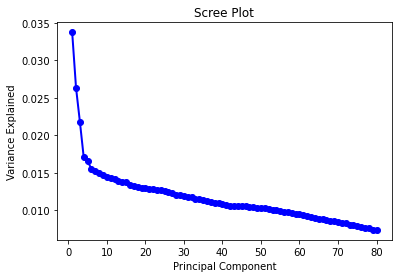

In [321]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

we thought it would be better to limit features' set to 47 features having the last explianed variance 0.010046

In [322]:
# fit PCA
pca = PCA(n_components = 47)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)


In [325]:
# Fitting XGB regressor model and default base learner is Decision Tree
xgb_regPCA = xgb.XGBRegressor(objective = "reg:squarederror",
                           n_estimators = 75,
                           subsample = 0.75,
                           max_depth = 7)


In [326]:
xgb_regPCA.fit(X_train_pca, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=75, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [327]:
# Making Predictions
predictionsPCA = xgb_regPCA.predict(X_test_pca)

In [328]:
# Computing RMSE
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test1, predictionsPCA))))

RMSE: 391.093405


In [329]:
# Computing MAE
print("MAE: %f" % (mean_absolute_error(y_test1, predictionsPCA)))

MAE: 177.029452


###### R2 score: A higher value of R2 is desirable as it indicates better results.

In [330]:
r2_score(y_true=y_test1, y_pred=predictionsPCA)

0.12363418191800868

### Build the Model

In [ ]:
# Make a simple linear regression model

simp_lr = LinearRegression()

In [50]:
df2['Property_id'].unique

<bound method Series.unique of 0       6330099
1       5326174
2       5987844
3       3889445
4       6284346
         ...   
1020     737295
1021    3418383
1022     371101
1023    3445586
1024    3970957
Name: Property_id, Length: 1025, dtype: int64>

In [51]:
df3.corr()

,Star_Rating,Customers_Rating,Customers_Review,Max_persons,Review_title,Total_Price,NumberOfBeds,extra-large double,sofa bed,large double,...,Type_of_room_Standard King Room,Type_of_room_Standard Room,Type_of_room_Standard Studio,Type_of_room_Standard Twin Room,Type_of_room_Studio,Type_of_room_Studio Apartment,Type_of_room_Superior Room,Type_of_room_Triple Room,Type_of_room_Twin Room,Type_of_room_Villa
Star_Rating,1.000000,0.399431,0.370919,-0.087279,0.214432,0.397849,-0.089252,0.084703,-0.060233,0.058475,...,0.060207,0.146648,-0.039015,0.028692,-0.135369,-0.109816,0.192890,0.046454,0.054883,-0.055394
Customers_Rating,0.399431,1.000000,0.150878,0.102700,0.430320,0.295571,0.077320,0.208493,0.052309,0.044325,...,0.060810,0.055472,-0.053722,-0.022930,-0.094887,-0.079232,0.125835,-0.023295,-0.020887,0.132451
Customers_Review,0.370919,0.150878,1.000000,-0.086274,0.115339,0.329927,-0.055928,-0.039519,-0.044168,-0.006372,...,0.044112,0.083045,-0.059438,0.019960,-0.036379,-0.067019,0.177491,-0.023090,0.035806,-0.082578
Max_persons,-0.087279,0.102700,-0.086274,1.000000,0.039035,0.198123,0.740612,0.022324,0.293120,-0.026470,...,-0.037377,-0.045135,-0.080370,-0.044792,-0.076762,-0.034206,-0.051214,0.213288,-0.071027,0.418255
Review_title,0.214432,0.430320,0.115339,0.039035,1.000000,0.121277,0.063010,0.083925,0.028072,0.047314,...,0.065286,0.028914,-0.038084,0.027224,-0.040365,-0.052947,0.062402,0.044295,-0.037384,-0.007689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Type_of_room_Studio Apartment,-0.109816,-0.079232,-0.067019,-0.034206,-0.052947,-0.075602,-0.053053,0.000619,-0.018238,-0.000229,...,-0.022103,-0.029067,-0.047527,-0.026488,-0.056956,1.000000,-0.039240,-0.025806,-0.042002,-0.047527
Type_of_room_Superior Room,0.192890,0.125835,0.177491,-0.051214,0.062402,0.052503,-0.047258,0.041803,-0.027497,0.001794,...,-0.021840,-0.028722,-0.046962,-0.026173,-0.056280,-0.039240,1.000000,-0.025499,-0.041503,-0.046962
Type_of_room_Triple Room,0.046454,-0.023295,-0.023090,0.213288,0.044295,0.196590,0.138377,-0.020461,-0.009837,0.008871,...,-0.014363,-0.018889,-0.030885,-0.017213,-0.037012,-0.025806,-0.025499,1.000000,-0.027294,-0.030885
Type_of_room_Twin Room,0.054883,-0.020887,0.035806,-0.071027,-0.037384,0.011706,0.000949,-0.148237,-0.040058,-0.093215,...,-0.023378,-0.030744,-0.050268,-0.028016,-0.060241,-0.042002,-0.041503,-0.027294,1.000000,-0.050268


In [ ]:
corr = df3.corr()

# correlation --> -1 to 1
# - --> negative corelation 
# + --> positive corelation
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
sns.pairplot(df3)

In [111]:
# focus single variable because we're doing simple linear regression
X = df3.Customers_Rating
y = df3.Total_Price

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2)

In [112]:
simp_lr.fit(pd.DataFrame(X_train), y_train)

LinearRegression()

In [113]:
simp_lr.intercept_

-682.061439784363

In [114]:
simp_lr.coef_

array([133.20242153])

### Our Linear Regression Model

In [115]:
predictions = simp_lr.predict(pd.DataFrame(X_test))

predictions

array([ 343.59720603,  197.07454234,   90.51260512,  450.15914326,
        450.15914326,  370.23769034,  303.63647957,  530.08059618,
        383.55793249,  370.23769034,  503.44011187,  423.51865895,
        330.27696388,  170.43405804,   50.55187866,  170.43405804,
        330.27696388,  370.23769034,  450.15914326,  423.51865895,
        290.31623742,  436.83890111,  263.67575311,   90.51260512,
        423.51865895,  356.91744819,  476.79962757,  103.83284727,
        157.11381588,  263.67575311,  130.47333158,  130.47333158,
        276.99599526,  396.87817465,  410.1984168 ,  436.83890111,
        356.91744819,  303.63647957,  463.47938541,  556.72108049,
        130.47333158,  396.87817465,  463.47938541,  490.11986972,
        410.1984168 ,  170.43405804,  197.07454234,  396.87817465,
        303.63647957,  316.95672172,  410.1984168 ,  396.87817465,
        410.1984168 ,   37.2316365 ,  303.63647957,  103.83284727,
        276.99599526,  503.44011187,  356.91744819,  316.95672

In [116]:
r2_score(y_true=y_test, y_pred=predictions)

0.06860585243903561

In [117]:
mean_absolute_error(y_true=y_test, y_pred=predictions)

267.073597696658

In [ ]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_test, predictions, color = 'red')
plt.title('Simple Linear Regression booking Dataset Average Customers Rating vs Prices')
plt.xlabel('Average Customers Rating')
plt.ylabel('Total_Price')
plt.show()

In [ ]:
corr = df2.corr()

corr.style.background_gradient(cmap='coolwarm')

In [118]:
vars = [
        'Star_Rating', 'Customers_Rating','Customers_Review'
        ]

X = df2[vars]
y = df2.Total_Price

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2)

In [119]:
multi_lr = LinearRegression()

In [120]:
X_train

,Star_Rating,Customers_Rating,Customers_Review
365,3,7.1,237
22,5,8.0,2007
397,3,9.1,630
432,3,8.2,2146
188,4,7.5,315
...,...,...,...
299,3,6.6,34
534,2,5.9,122
584,0,5.6,214
493,2,6.5,1443


In [121]:
y_test

546      23.0
980     137.0
908     129.0
577      53.0
846     117.0
        ...  
1008    140.0
441     330.0
763     102.0
656      90.0
551      30.0
Name: Total_Price, Length: 257, dtype: float64

In [122]:
multi_lr = LinearRegression()

In [123]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data
X_scaled = scaler.fit_transform(X)

In [124]:
multi_lr.fit(X_train, y_train)

LinearRegression()

In [125]:
multi_lr.intercept_

-361.0130317892329

In [126]:
multi_lr.coef_

array([71.40403009, 64.23071761,  0.08565983])

In [127]:
multi_predictions = multi_lr.predict(X_test)

In [128]:
y_test.tail()

1008    140.0
441     330.0
763     102.0
656      90.0
551      30.0
Name: Total_Price, dtype: float64

In [129]:
r2_score(y_true=y_test, y_pred=multi_predictions)

0.48536233578504007

In [ ]:
mean_absolute_error(y_true=y_test, y_pred=predictions)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Function for evaluating regression models

def reg_cost(method, actual, preds):
    mae = mean_absolute_error(y_true=actual, y_pred=preds)
    mse = mean_squared_error(y_true=actual, y_pred=preds)
    
    print(f'Cost functions for the {method} regression is:')
    print(f'Mean Square Error: {round(mse,2)}')
    print(f'Mean Absolute Error: {round(mae,2)}\n\n')

In [ ]:
reg_cost("Linear Regression", y_test, multi_predictions)

In [ ]:
# Create a logistic regression model to compare with the decision tree model

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

preds_lin = reg_lin.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=preds_lin)

In [ ]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion = 'mse')
reg_forest.fit(X_train, y_train)

preds_forest = reg_forest.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=preds_forest)

In [ ]:
reg_tree = DecisionTreeRegressor(random_state = 0, max_depth= 4, criterion= 'mse')
reg_tree.fit(X_train, y_train)

preds_tree = reg_tree.predict(X_test)

mean_absolute_error(y_true=y_test, y_pred=preds_tree)

In [ ]:
reg_svr = SVR(kernel = 'linear')
reg_svr.fit(X_train, y_train)

preds_svr = reg_svr.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=preds_svr

In [ ]:
model_name = ['linear', 'Decision Tree', 'Random Forest', 'Support Vector']
model_pred = [preds_lin, preds_tree, preds_forest, preds_svr]

for x in range(len(model_pred)):
    
    reg_cost(model_name[x],y_test, model_pred[x] )

In [ ]:
y_test_np = np.array(y_test)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    print(type(y_true))
    return np.abs((y_true - y_pred) / y_true) * 100

In [ ]:
mean_absolute_percentage_error(y_test, multi_predictions)

In [ ]:
#Step1:
    # how to combine 3 numpy.ndarrays (y_test, y_predicted, absolute error percentage) into a pandas dataframe
#Step 2:
# combine x_test to your dataframe
